### Шаг 0. Подгрузка данных и библиотек

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
df = pd.read_csv('chess.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


### Шаг 1. Обработка пропусков и дубликатов


##### Количество пропусков и дубликатов

In [2]:
print('Количество пропусков: ', df.isna().sum().sum())
print('Количество дубликатов: ', df.duplicated().sum())

Количество пропусков:  0
Количество дубликатов:  429


Исключим дубликаты

In [3]:
df = df.drop_duplicates(keep='first')
print('Количество дубликатов: ', df.duplicated().sum())

Количество дубликатов:  0


### Шаг 2. Кодирование категроиальных признаков

In [ ]:
states = df['victory_status'].unique()
le = LabelEncoder()


##### One-hot кодирование

In [8]:
states = df['victory_status']
encoded = pd.get_dummies(states)
print(encoded)

       draw  mate  outoftime  resign
0         0     0          1       0
1         0     0          0       1
2         0     1          0       0
3         0     1          0       0
4         0     1          0       0
...     ...   ...        ...     ...
20053     0     0          0       1
20054     0     1          0       0
20055     0     1          0       0
20056     0     0          0       1
20057     0     1          0       0

[19629 rows x 4 columns]


### Шаг 3. Масштабирование данных

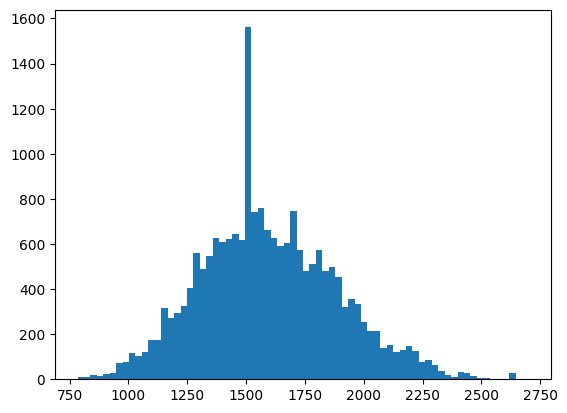

In [16]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['white_rating']])
plt.hist(df['white_rating'], 70)
plt.show()

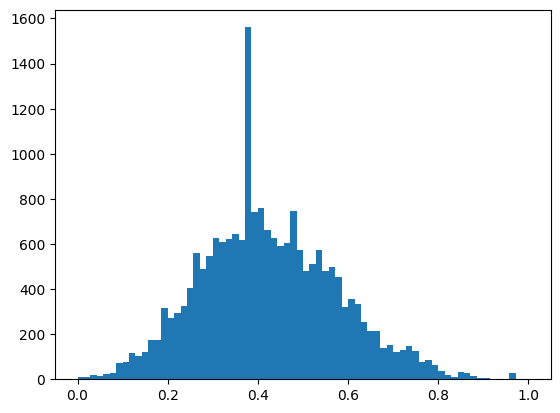

In [18]:
plt.hist(sc1_data, 70)
plt.show()

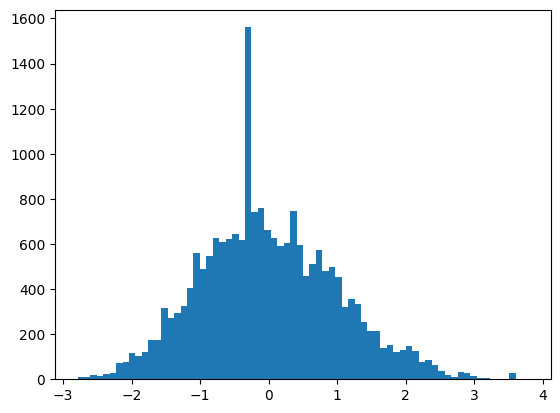

In [19]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['white_rating']])
plt.hist(sc2_data, 70)
plt.show()